# Programming for Data Analysis Assignment

In [1]:
import numpy as np
import pandas as pd

# https://www.pgatour.com/stats/detail/120
df = pd.read_csv('pgatour_golfstats_2022-2023_averagescore.csv')
df

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL STROKES,TOTAL ADJUSTMENT,TOTAL ROUNDS
0,1,0,46046,Scottie Scheffler,68.629,6007,32.329,88
1,2,0,28237,Rory McIlroy,68.777,4411,-9.244,64
2,3,0,46970,Jon Rahm,69.037,4886,15.615,71
3,4,0,46717,Viktor Hovland,69.123,6065,17.843,88
4,5,0,48081,Xander Schauffele,69.127,5595,4.323,81
...,...,...,...,...,...,...,...,...
184,185,-2,51950,Max McGreevy,72.603,6170,73.869,86
185,186,-2,28420,Ryan Brehm,72.739,5740,79.134,80
186,187,-2,32662,Michael Gligic,72.775,4953,68.445,69
187,188,-2,27095,Nick Watney,72.936,5052,53.529,70


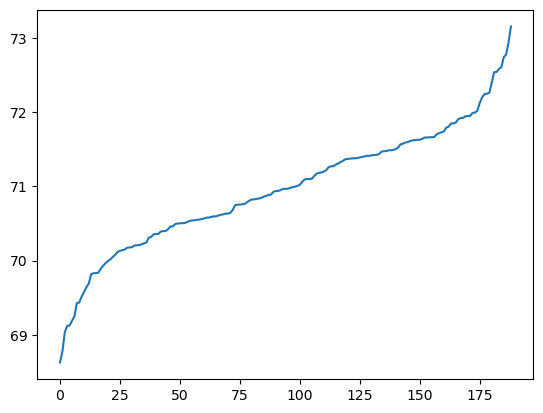

In [2]:
import matplotlib.pyplot as plt
x = df.AVG
plt.plot(df.AVG)
plt.show()

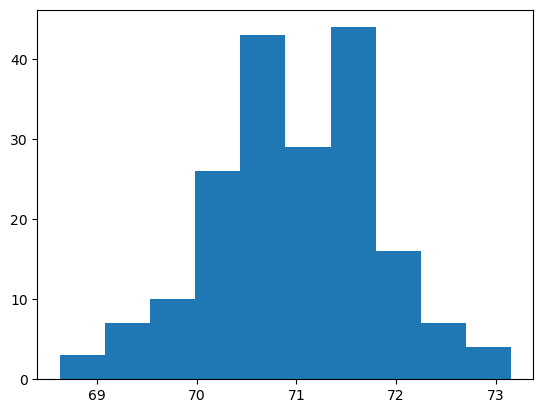

In [3]:
# Plot Average Score data from pgatour_golfstats_2022-2023_averagescore.csv
plt.hist(x, bins=10)
plt.show()

In [4]:
df.AVG

0      68.629
1      68.777
2      69.037
3      69.123
4      69.127
        ...  
184    72.603
185    72.739
186    72.775
187    72.936
188    73.153
Name: AVG, Length: 189, dtype: float64

In [5]:
std = df.AVG.std()
std

0.8301339718593281

In [6]:
mean = df.AVG.mean()
mean

70.96867724867725

In [7]:
df.describe()

,RANK,MOVEMENT,PLAYER_ID,AVG,TOTAL STROKES,TOTAL ADJUSTMENT,TOTAL ROUNDS
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,94.957672,-0.449735,39114.994709,70.968677,5977.037037,53.245196,85.026455
std,54.705579,3.487647,10294.967774,0.830134,1123.886273,26.348952,16.241670
min,1.000000,-13.000000,12716.000000,68.629000,3198.000000,-18.811000,45.000000
25%,48.000000,-2.000000,31560.000000,70.461000,5217.000000,35.723000,74.000000
50%,94.000000,0.000000,36699.000000,70.966000,6065.000000,55.784000,86.000000
75%,142.000000,2.000000,48117.000000,71.524000,6799.000000,73.356000,96.000000
max,189.000000,19.000000,59018.000000,73.153000,8450.000000,106.517000,122.000000


In [8]:
count = df.count()
count

RANK                189
MOVEMENT            189
PLAYER_ID           189
PLAYER              189
AVG                 189
TOTAL STROKES       189
TOTAL ADJUSTMENT    189
TOTAL ROUNDS        189
dtype: int64

In [9]:
# Synthesize a random normal distribution for Average Score
# I choose mu of 70.96 because this is the average score in pgatour_golfstats_2022-2023_averagescore.csv
y = np.random.normal(mean,std,189)
y

array([70.1852922 , 70.86970634, 70.73510139, 72.33336937, 70.50861539,
       70.3876152 , 71.314391  , 71.58366696, 70.81448583, 69.71550263,
       70.41809714, 69.73453221, 69.79771557, 70.52281863, 70.99727982,
       70.66631101, 70.81633423, 70.57629998, 71.76518355, 70.73758672,
       72.79729502, 70.50344531, 72.05221928, 72.11498795, 71.02132145,
       70.94744381, 72.08759927, 70.77382915, 70.66007177, 71.70501313,
       71.27020457, 69.86457477, 71.71172826, 71.63441387, 72.12145515,
       70.48186158, 70.54008725, 70.60027599, 70.10084134, 71.74697736,
       71.36930667, 70.87213335, 70.75027377, 70.68382277, 71.838627  ,
       71.41817457, 70.87782018, 71.1150672 , 70.18871178, 70.17578771,
       69.87000824, 68.76388634, 69.36673554, 70.92791024, 70.99987754,
       70.53958144, 71.92202567, 72.22691358, 70.81754432, 72.27719916,
       71.38029402, 70.9877735 , 71.50649936, 70.32412578, 71.69771788,
       72.1603022 , 72.14156908, 70.82677813, 71.32495803, 70.81

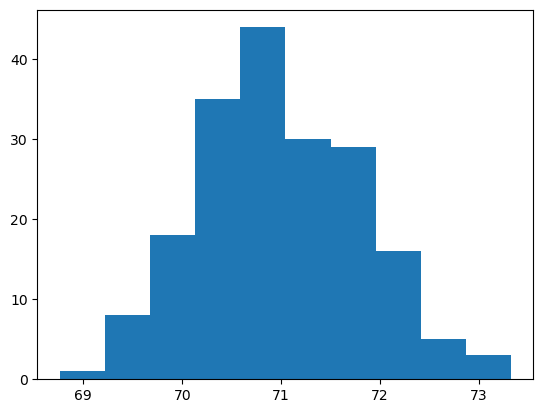

In [10]:
# Plot random normal distribution for Average Score
plt.hist(y)
plt.show()

In [11]:
# Synthesize a poisson distribution for Average Score
p = np.random.default_rng().poisson(mean, 189)
p

array([77, 52, 60, 61, 66, 64, 87, 63, 86, 72, 89, 71, 57, 81, 83, 47, 68,
       67, 80, 66, 68, 66, 59, 52, 67, 77, 67, 64, 78, 71, 66, 79, 67, 69,
       83, 69, 70, 62, 79, 82, 58, 59, 82, 70, 76, 64, 60, 84, 56, 72, 87,
       61, 79, 65, 64, 88, 72, 78, 71, 70, 69, 63, 72, 82, 75, 76, 93, 74,
       78, 73, 84, 84, 68, 69, 89, 59, 79, 79, 60, 68, 73, 93, 71, 68, 65,
       62, 63, 73, 79, 76, 57, 62, 59, 58, 65, 73, 83, 63, 52, 69, 73, 84,
       79, 82, 55, 80, 76, 83, 61, 71, 69, 70, 57, 70, 55, 70, 74, 71, 86,
       68, 64, 50, 68, 84, 59, 85, 65, 77, 65, 77, 75, 70, 94, 70, 63, 72,
       80, 67, 70, 72, 70, 86, 66, 76, 72, 86, 58, 73, 72, 80, 70, 71, 65,
       95, 78, 62, 88, 69, 68, 70, 78, 69, 72, 73, 90, 75, 82, 67, 78, 70,
       80, 74, 65, 73, 84, 74, 61, 76, 73, 72, 63, 70, 80, 68, 58, 65, 63,
       79, 84], dtype=int64)

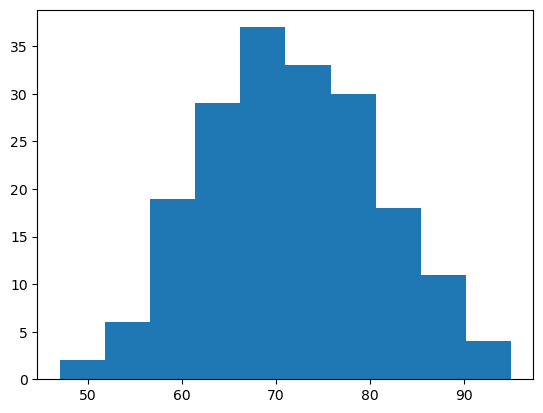

In [12]:
# Plot poisson distribution for Average Score
plt.hist(p)
plt.show()

In [13]:
# https://www.pgatour.com/stats/detail/101
df1 = pd.read_csv('pgatour_golfstats_2022-2023_driving.csv')
df1

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE,TOTAL DRIVES
0,1,0,28237,Rory McIlroy,326.3,41771,128
1,2,0,51491,Brandon Matthews,321.3,37915,118
2,3,0,52372,Cameron Champ,318.8,47180,148
3,4,0,52453,Nicolai Hojgaard,317.7,29227,92
4,5,0,57366,Cameron Young,316.5,51902,164
...,...,...,...,...,...,...,...
184,185,-2,30927,Brendon Todd,282.8,54300,192
185,186,-2,40058,Zac Blair,282.4,42920,152
186,187,-2,31202,William McGirt,281.0,25292,90
187,188,-2,34409,David Lingmerth,279.2,45789,164


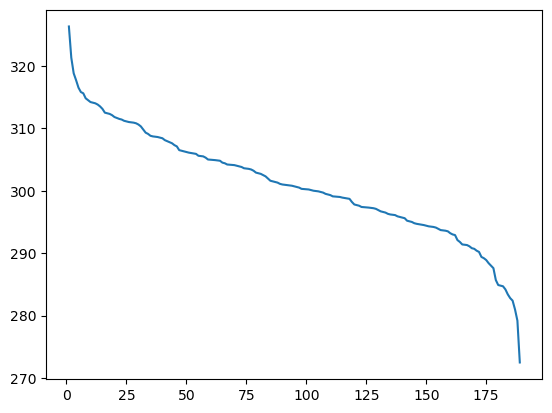

In [14]:
x = df1.RANK
y = df1.AVG
plt.plot(x,y)
plt.show()

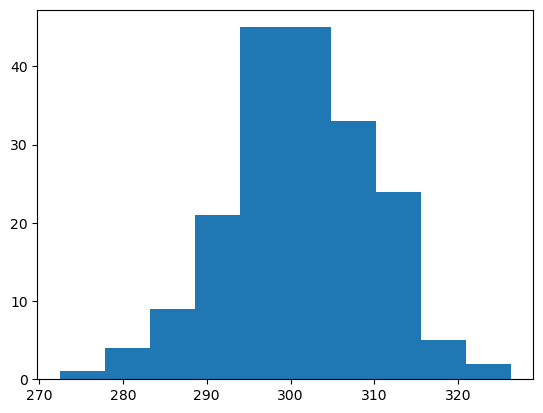

In [15]:
# Plot Driving Distance data from pgatour_golfstats_2022-2023_driving.csv
plt.hist(y, bins=10)
plt.show()

In [16]:
df1.AVG

0      326.3
1      321.3
2      318.8
3      317.7
4      316.5
       ...  
184    282.8
185    282.4
186    281.0
187    279.2
188    272.5
Name: AVG, Length: 189, dtype: float64

In [17]:
std = df1.AVG.std()
std

8.66203975287581

In [18]:
mean = df1.AVG.mean()
mean

300.96402116402106

In [19]:
df1.describe()

,RANK,MOVEMENT,PLAYER_ID,AVG,TOTAL DISTANCE,TOTAL DRIVES
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000
mean,94.719577,-0.904762,39114.994709,300.964021,51175.285714,170.05291
std,54.711144,1.968212,10294.967774,8.662040,9840.011169,32.48334
min,1.000000,-5.000000,12716.000000,272.500000,25292.000000,90.00000
25%,48.000000,-2.000000,31560.000000,295.200000,44589.000000,148.00000
50%,94.000000,-1.000000,36699.000000,300.800000,51338.000000,172.00000
75%,142.000000,0.000000,48117.000000,306.400000,57791.000000,192.00000
max,189.000000,7.000000,59018.000000,326.300000,72978.000000,244.00000


In [20]:
count = df1.count()
count

RANK              189
MOVEMENT          189
PLAYER_ID         189
PLAYER            189
AVG               189
TOTAL DISTANCE    189
TOTAL DRIVES      189
dtype: int64

In [21]:
# Synthesize a random normal distribution for Driving Distance
# I choose mu of 300.5 because this is the average drivage distance in pgatour_golfstats_2022-2023_driving.csv
mu, sigma = 300.96, 8.66 # mean and standard deviation
s = np.random.default_rng().normal(mu, sigma, 189)
s

array([304.18111094, 306.01044938, 292.94529885, 299.62528769,
       295.13281449, 311.26815176, 289.55236822, 315.91930478,
       290.03459055, 304.9753658 , 305.19440612, 310.55222038,
       299.97033998, 292.1743655 , 314.96208214, 309.86199752,
       305.04885077, 297.87571132, 301.52899846, 304.9946468 ,
       311.02220154, 289.03737716, 297.8689922 , 295.79293457,
       303.78467302, 295.31524066, 295.18313949, 314.4789164 ,
       275.51005097, 294.72435667, 310.47504209, 301.8374851 ,
       313.11719201, 299.02888099, 315.2028615 , 301.32293673,
       300.60302143, 318.78421997, 301.35622356, 310.54176655,
       321.44215857, 294.57058864, 295.87807079, 294.25208599,
       302.65842155, 309.55926947, 291.17611298, 316.81096175,
       290.87245364, 302.00592681, 299.81573458, 303.56143547,
       299.49642999, 290.76447491, 291.91615572, 287.25683334,
       301.4498885 , 295.15786451, 316.45534104, 304.6559164 ,
       296.31268786, 300.39036223, 300.73520037, 305.83

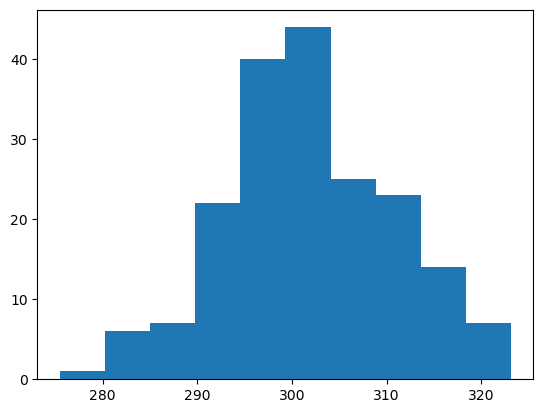

In [22]:
# Plot random normal distribution for Driving Distance
plt.hist(s)
plt.show()

In [23]:
# Synthesize a poisson distribution for Driving Distance
p = np.random.default_rng().poisson(mu,189)
p

array([333, 324, 290, 293, 274, 294, 318, 303, 300, 325, 325, 284, 274,
       286, 291, 306, 268, 311, 299, 274, 315, 305, 289, 295, 267, 314,
       306, 284, 315, 295, 301, 317, 328, 307, 283, 291, 325, 285, 283,
       310, 292, 275, 265, 301, 298, 304, 289, 317, 271, 275, 320, 308,
       337, 363, 292, 306, 299, 307, 294, 297, 307, 310, 273, 307, 317,
       308, 302, 295, 304, 279, 300, 291, 273, 311, 296, 289, 277, 274,
       333, 283, 301, 343, 296, 316, 278, 299, 283, 285, 302, 324, 295,
       292, 292, 311, 287, 280, 341, 302, 292, 282, 320, 257, 294, 320,
       296, 345, 304, 253, 315, 302, 315, 285, 300, 300, 305, 302, 296,
       304, 312, 289, 325, 273, 313, 320, 337, 295, 329, 296, 307, 300,
       284, 321, 303, 304, 321, 332, 296, 285, 298, 287, 293, 319, 317,
       309, 275, 260, 283, 297, 296, 281, 319, 336, 329, 312, 321, 319,
       298, 312, 329, 289, 286, 290, 308, 302, 285, 319, 322, 305, 318,
       304, 298, 304, 298, 299, 296, 322, 292, 275, 298, 309, 30

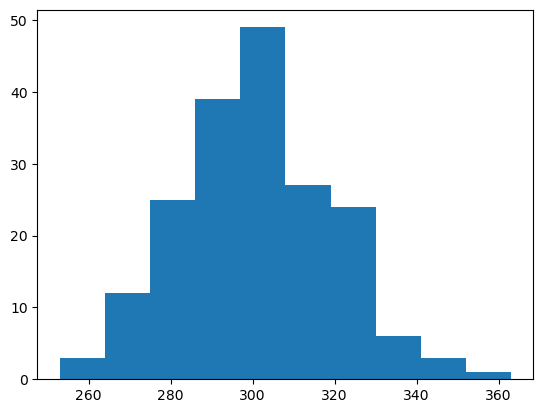

In [24]:
# Plot poisson distribution for Driving Distance
plt.hist(p)
plt.show()

In [25]:
def f(x):
  A = 1.0 / np.sqrt(2.0 * np.pi)
  B = np.exp(-(x**2) / 2.0)
  return A * B

In [26]:
f(0.0)

0.3989422804014327

In [27]:
f(3.0)

0.0044318484119380075

In [28]:
f(300.0)

0.0

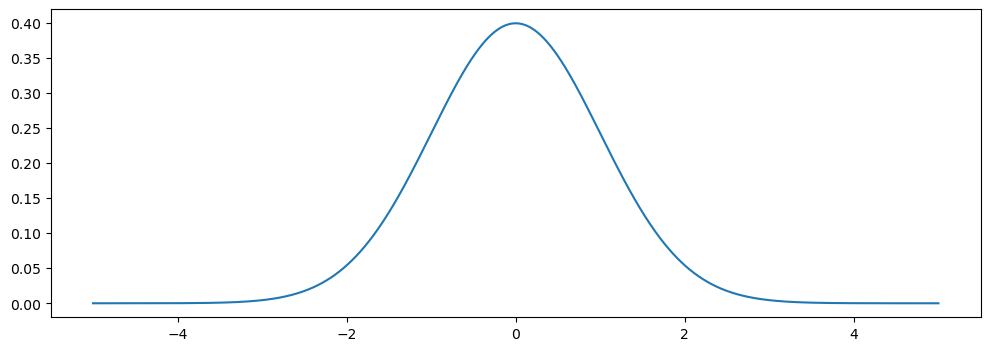

In [29]:
# Range of x values for plotting.
x = np.linspace(-5.0, 5.0, 1001)

# Create empty plot.
fig, ax = plt.subplots(figsize=(12, 4))

# Plot f(x).
ax.plot(x, f(x));

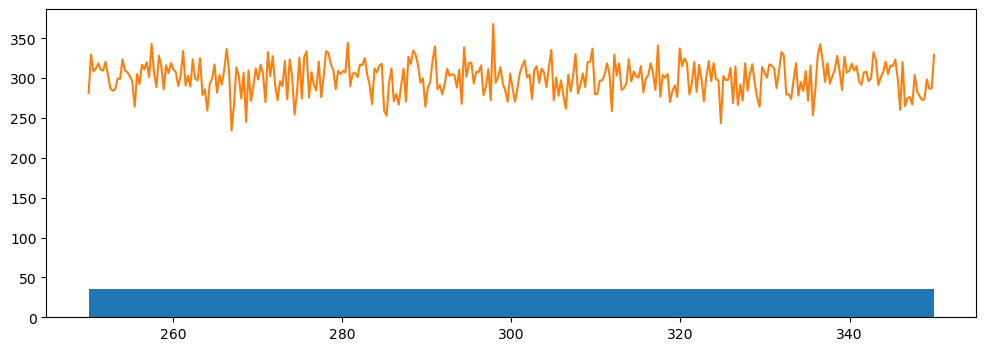

In [30]:
# Range of x values for plotting.
x = np.linspace(250.0, 350.0,350)
y=  np.random.normal(300,20,350)

# Create empty plot.
fig, ax = plt.subplots(figsize=(12, 4))

# Plot f(x).
ax.hist(x)

# Plot histogram of randomly generated normal values from above.
ax.plot(x, y)

plt.show()

In [31]:
import numpy as np
rng = np.random.default_rng()
rng.integers(10,25)

12

In [32]:
rng = np.random.default_rng()
rng.integers(100, size=10)

array([50, 36, 86, 38, 73, 71, 73, 94, 55, 99], dtype=int64)

In [33]:
rng = np.random.default_rng()
rng.integers(50,100, size=10)

array([65, 71, 80, 93, 77, 70, 80, 57, 95, 86], dtype=int64)

In [34]:
rng = np.random.default_rng()
rng.integers(100, size=(2,4))

array([[ 8, 73, 60, 65],
       [ 6, 51, 27, 94]], dtype=int64)

In [35]:
rng = np.random.default_rng()
rng.random()

0.6235462855100643

In [36]:
rng = np.random.default_rng()
rng.random(5)

array([0.7948405 , 0.59465011, 0.40770348, 0.47788421, 0.80953573])

In [37]:
rng = np.random.default_rng()
rng.random((5,4))

array([[0.06675323, 0.1895296 , 0.4163766 , 0.75894809],
       [0.853645  , 0.07513116, 0.5833451 , 0.1005552 ],
       [0.5472474 , 0.12807188, 0.33894482, 0.22551579],
       [0.02287089, 0.85199816, 0.12692673, 0.81472591],
       [0.33926148, 0.07101864, 0.18298819, 0.96048957]])

In [38]:
rng = np.random.default_rng()
x = rng.random(1000000)

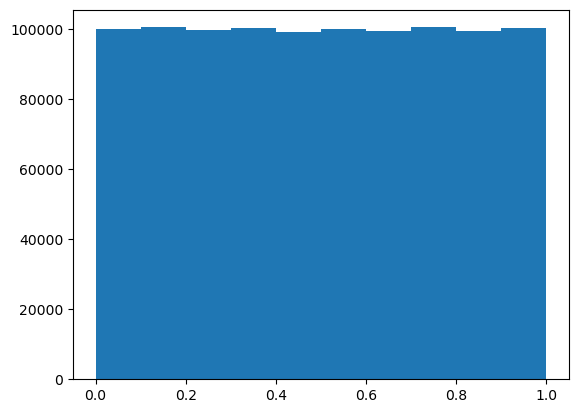

In [39]:
import matplotlib.pyplot as plt
plt.hist(x)
plt.show()

In [40]:
rng = np.random.default_rng(seed=43)
x = rng.random()
print(x)

0.6522992627009107


In [41]:
rng = np.random.default_rng(seed=44)
x = rng.integers(10)
print(x)

6


In [42]:
rng = np.random.default_rng(seed=43)
x = rng.random((2,4))
print(x)

[[0.65229926 0.04377532 0.02002959 0.83921258]
 [0.58714305 0.22470523 0.75179227 0.2636922 ]]


In [43]:
rng = np.random.default_rng(seed=43)
x = rng.integers(50,100,size=(3,3))
print(x)

[[75 82 70]
 [52 78 51]
 [63 91 73]]
